In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from nn_utils import *

tf.enable_eager_execution()

In [2]:
# Get dataset
train_set_input,train_set_label,test_set_input,test_set_label = load_dataset()

print("Images train:", train_set_input.shape)
print("Labels train:", train_set_label.shape)
print("Images test:", test_set_input.shape)
print("Labels test:", test_set_label.shape)

classes = ["copperhead","cottonmouth","watersnake"]

Images train: (776, 128, 128, 3)
Labels train: (776,)
Images test: (86, 128, 128, 3)
Labels test: (86,)


In [3]:
train_set_input[0,:,:,:].shape

(128, 128, 3)

In [4]:
# Transform the label on vector label

Y_train = convert_to_one_hot(train_set_label,3)
Y_test = convert_to_one_hot(test_set_label,3)

Classe: watersnake


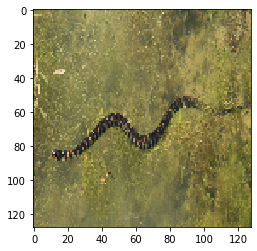

In [5]:
# Print a random Image from the train set
idx = np.random.randint(0,train_set_input.shape[0])
plt.imshow(train_set_input[idx])
print("Classe: {}".format(classes[np.where(Y_train[:,idx]==1)[0][0]]))

In [6]:
def augment_data_set(input_dataset,input_labels):
    augmented_dataset_image = input_dataset
    augmented_dataset_label = input_labels
    for i in range(input_dataset.shape[0]):
        img = input_dataset[i,:,:,:]
        label = input_labels[i]
        img_flip = tf.image.flip_left_right(img)
        img_rot_1 = tf.contrib.image.rotate(img,np.deg2rad(25))
        img_rot_2 = tf.contrib.image.rotate(img,np.deg2rad(-25))
        img_flip = img_flip.numpy().reshape((1,128,128,3))
        img_rot_1 = img_rot_1.numpy().reshape((1,128,128,3))
        img_rot_2 = img_rot_2.numpy().reshape((1,128,128,3))
        augmented_dataset_image = np.concatenate((augmented_dataset_image,img_flip),axis=0)
        augmented_dataset_label = np.append(augmented_dataset_label,label)
        augmented_dataset_image = np.concatenate((augmented_dataset_image,img_rot_1),axis=0)
        augmented_dataset_label = np.append(augmented_dataset_label,label)
        augmented_dataset_image = np.concatenate((augmented_dataset_image,img_rot_2),axis=0)
        augmented_dataset_label = np.append(augmented_dataset_label,label)
    # SHUFFLE DATASET
    np.random.seed(123)
    idx = np.random.permutation(len(augmented_dataset_image))
    augmented_dataset_image = augmented_dataset_image[idx]
    augmented_dataset_label = augmented_dataset_label[idx]
    return augmented_dataset_image,augmented_dataset_label

In [7]:
augmented_dataset_image,augmented_dataset_label = augment_data_set(train_set_input,train_set_label)

W0925 15:39:34.163533 140045130336064 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



Classe: cottonmouth


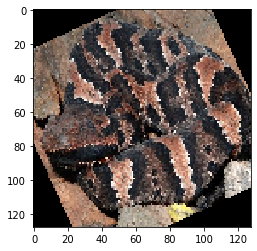

In [8]:
Y_train = convert_to_one_hot(augmented_dataset_label,3)

idx = np.random.randint(0,augmented_dataset_image.shape[0])
plt.imshow(augmented_dataset_image[idx])
print("Classe: {}".format(classes[np.where(Y_train[:,idx]==1)[0][0]]))

In [6]:
# Reshape Data for FC NN

# Normalize
#X_train = augmented_dataset_image/255
X_train = train_set_input/255
X_test = test_set_input/255
# Reshape
# X_train = X_train.reshape(X_train.shape[0],-1).T
# X_test = X_test.reshape(X_test.shape[0],-1).T

print(X_train.shape)
print(Y_train.shape)

print(X_test.shape)
print(Y_test.shape)



(776, 128, 128, 3)
(3, 776)
(86, 128, 128, 3)
(3, 86)


## ARCHITECTURE of the NN

In [7]:
model = Sequential([
    layers.Flatten(input_shape=(128, 128,3)),
    layers.Dense(128,activation=tf.nn.relu),
    layers.Dense(64,activation=tf.nn.relu),
    layers.Dense(3,activation=tf.nn.softmax)]
)

In [8]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
model.fit(X_train, Y_train.T, epochs=50,batch_size=16)

Epoch 1/50
776/776 [==============================] - 0s 342us/sample - loss: 10.5308 - acc: 0.3466
Epoch 2/50
776/776 [==============================] - 0s 262us/sample - loss: 10.5308 - acc: 0.3466
Epoch 3/50
776/776 [==============================] - 0s 272us/sample - loss: 10.5308 - acc: 0.3466
Epoch 4/50
776/776 [==============================] - 0s 272us/sample - loss: 10.5308 - acc: 0.3466
Epoch 5/50
776/776 [==============================] - 0s 270us/sample - loss: 10.5308 - acc: 0.3466
Epoch 6/50
776/776 [==============================] - 0s 265us/sample - loss: 10.5308 - acc: 0.3466
Epoch 7/50
776/776 [==============================] - 0s 273us/sample - loss: 10.5308 - acc: 0.3466
Epoch 8/50
776/776 [==============================] - 0s 265us/sample - loss: 10.5308 - acc: 0.3466
Epoch 9/50
776/776 [==============================] - 0s 255us/sample - loss: 10.5308 - acc: 0.3466
Epoch 10/50
776/776 [==============================] - 0s 222us/sample - loss: 10.5308 - acc: 0.3466

In [12]:
test_loss, test_acc = model.evaluate(X_test, Y_test.T)

print('Test accuracy:', test_acc)

86/86 [==============================] - 0s 680us/sample - loss: 10.4955 - acc: 0.3488
Test accuracy: 0.3488372


In [13]:
predictions = model.predict(X_test)

Predicted Classe: cottonmouth
Classe: cottonmouth


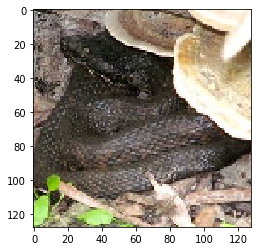

In [14]:
idx = np.random.randint(0,test_set_input.shape[0])
plt.imshow(test_set_input[idx])
print("Predicted Classe: {}".format(classes[np.argmax(predictions[idx,:])]))
print("Classe: {}".format(classes[np.where(Y_test[:,idx]==1)[0][0]]))

In [30]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 49152)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               6291584   
_________________________________________________________________
dense_7 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 195       
Total params: 6,300,035
Trainable params: 6,300,035
Non-trainable params: 0
_________________________________________________________________
